Report Companion

Data Exploration

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torchvision.transforms as transforms
from src.datasets.plant_village import PlantVillage
import os
import numpy as np
from PIL import Image
import textwrap

In [8]:
# load dataset
PLANTVILLAGE_PATH = f"../data/raw/Plant_leave_diseases_dataset_without_augmentation"
dataset = PlantVillage(PLANTVILLAGE_PATH)
plant_village = dataset.plantvillage

# get all classes except background ones
disease_classes = [cls for cls in plant_village.classes if 'Background_without_leaves' not in cls]

# print classes of plant village
print(f"Total number of Classes: {len(disease_classes)}\n")

wrapped_text = textwrap.fill(str(disease_classes), width=130)
print(wrapped_text)


Total number of Classes: 38

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy',
'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust',
'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)',
'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
'Tomato___Tomato_Yellow_Leaf_Curl

In [9]:
# identifying unique plants and diseseas
unique_plants = []
num_diseases = 0
for plant in disease_classes:
    if plant.split('___')[0] not in unique_plants:
        unique_plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        num_diseases += 1

print(f"Unique Plants:", end=' ')
wrapped_text = textwrap.fill(str(unique_plants), width=130)
print(wrapped_text)

print(f"\nNumber of Unique Plants: {len(unique_plants)}")
print(f"Number of Identfiable Diseases: {num_diseases}")



Unique Plants: ['Apple', 'Blueberry', 'Cherry', 'Corn', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash',
'Strawberry', 'Tomato']

Number of Unique Plants: 14
Number of Identfiable Diseases: 26


In [11]:
# number of images per class

num_images_per_class = {}
for disease in disease_classes:
    num_images_per_class[disease] = len(os.listdir(os.path.join(PLANTVILLAGE_PATH, disease)))

# converting to dataframe
imgs_per_class = pd.DataFrame(num_images_per_class.items(), columns=['Class', 'Number of Images'])
# print(imgs_per_class)
imgs_per_class.sort_values(by='Number of Images', ascending=False)

,Class,Number of Images
15,Orange___Haunglongbing_(Citrus_greening),5507
35,Tomato___Tomato_Yellow_Leaf_Curl_Virus,5357
24,Soybean___healthy,5090
16,Peach___Bacterial_spot,2297
28,Tomato___Bacterial_spot,2127
30,Tomato___Late_blight,1909
25,Squash___Powdery_mildew,1835
32,Tomato___Septoria_leaf_spot,1771
33,Tomato___Spider_mites Two-spotted_spider_mite,1676
3,Apple___healthy,1645


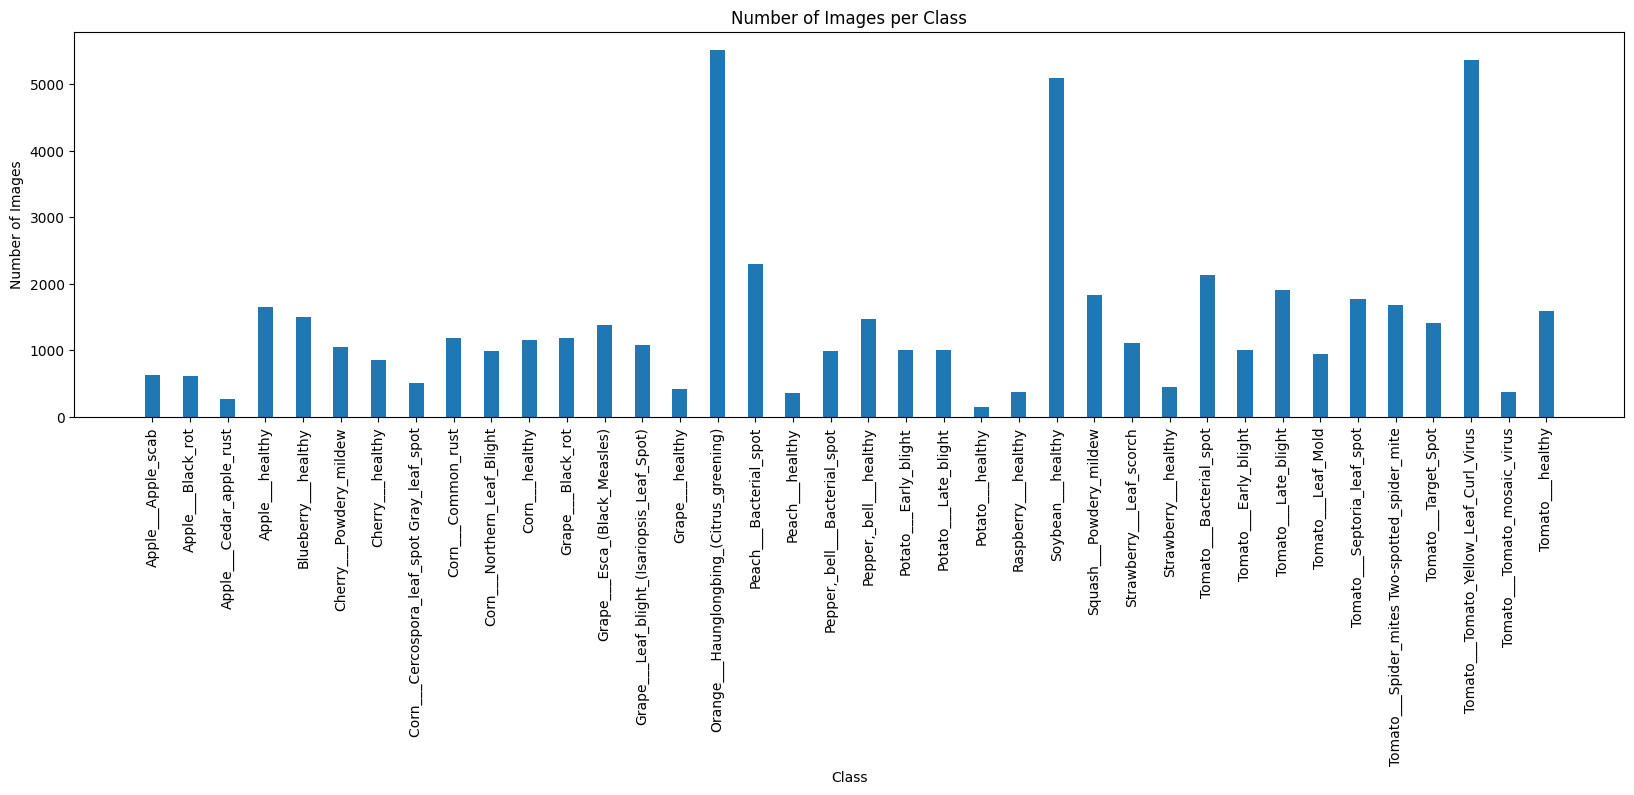

In [12]:
# plotting number of images per class

idx = [i for i in range(len(disease_classes))]
plt.figure(figsize=(20, 5))
plt.bar(idx, [i for i in num_images_per_class.values()], width=0.4)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(idx, disease_classes, rotation=90)
plt.title('Number of Images per Class')
plt.show()

In [7]:
# have to condense the dataset to about 

In [ ]:
# some images from the dataset

